# Trabajo práctico 3
**Inteligencia Artificial - CEIA - FIUBA**

## Autores

- **Mealla Pablo**.
- **Mendoza Dante**.
- **Vasquez Jorge**.
- **Viñas Gustavo**.

## Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

* `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.  

Además, hay una columna adicional llamada spam, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

**Tareas y preguntas a resolver:**

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?
2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).
3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.
4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).
5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?
6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.
7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.



### 🔍 1. Análisis de palabras más frecuentes

Las 10 palabras mas encontradas en correos SPAM son:


,Word,Count
0,word_freq_you,4105599
1,word_freq_your,2502597
2,word_freq_will,997100
3,word_freq_free,939790
4,word_freq_our,931799
5,char_freq_!,931352
6,word_freq_all,732080
7,word_freq_mail,635470
8,word_freq_email,578759
9,word_freq_business,521250


Las 10 palabras mas encontradas en correos NO SPAM son:


,Word,Count
0,word_freq_you,3541702
1,word_freq_george,3527559
2,word_freq_hp,2496576
3,word_freq_will,1495268
4,word_freq_your,1223098
5,word_freq_hpl,1204398
6,word_freq_re,1159138
7,word_freq_edu,800669
8,word_freq_address,681569
9,word_freq_meeting,604460


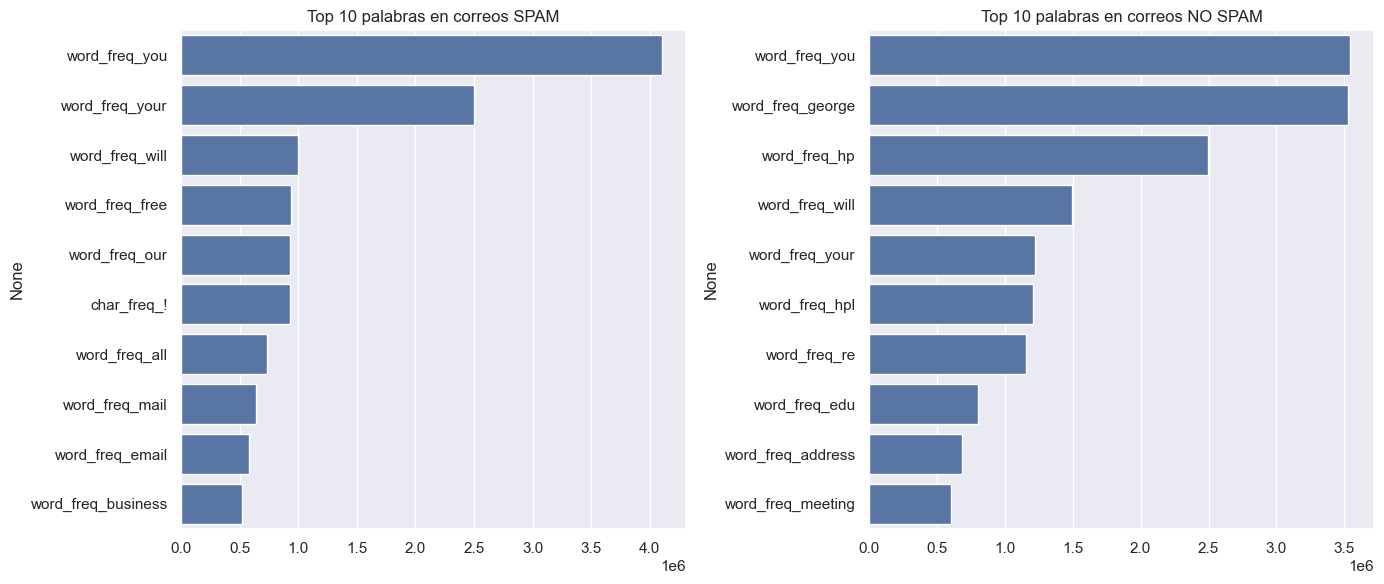

Palabras en común:


['word_freq_you', 'word_freq_your', 'word_freq_will']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

dataset = pd.read_csv("./spambase.csv")

print("Las 10 palabras mas encontradas en correos SPAM son:")
spam_top_words = dataset[dataset["spam"] == 1].sum().sort_values(ascending=False).head(10)
display(pd.DataFrame(spam_top_words, columns=["Count"]).reset_index(names="Word"))

print("Las 10 palabras mas encontradas en correos NO SPAM son:")
no_spam_top_words = dataset[dataset["spam"] != 1].sum().sort_values(ascending=False).head(10)
display(pd.DataFrame(no_spam_top_words, columns=["Count"]).reset_index(names="Word"))

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.barplot(x=spam_top_words.values, y=spam_top_words.index)
plt.title("Top 10 palabras en correos SPAM")

plt.subplot(1, 2, 2)
sns.barplot(x=no_spam_top_words.values, y=no_spam_top_words.index)
plt.title("Top 10 palabras en correos NO SPAM")

plt.tight_layout()
plt.show()

print("Palabras en común:")
display(list(spam_top_words.index.intersection(no_spam_top_words.index)))

Es llamativo que la palabra mas frecuente en ambos casos sea `you`.  
Algo parecido se observa con la palabra `your`, que es la segunda mas frecuente en SPAM y quinta en NO SPAM, o `will` que aparece tercera en SPAM y cuarta en NO SPAM.  
Entendemos que esas palabras pueden confundir o no determinar si un correo es SPAM o NO SPAM, sobre todo si las 3 mas frecuentes en SPAM aparecen muchisimo en NO SPAM.  
Llama la atención que entre las palabras mas frecuentes en correos NO SPAM encontramos nombres propios o marcas (`george`, `hp`). Esto indicaría que si el correo tiene esas palabras, tiene mucha posibilidad de no ser spam. Tambien aparecen palabras como `edu` y `meeting`, que podríamos asociarlas a tipos de correos laborales o institucionales.

Por otro lado, resulta intuitivo observar palabras en SPAM tales como `free`, el caracter `!`, `all`, `mail`, `email`, `business`.

### 📊 2. División del conjunto de datos

In [2]:
from sklearn.model_selection import train_test_split

# Separamos el dataset en entrenamiento y evaluacion
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns="spam"), dataset["spam"], test_size=0.3, random_state=42)


### 🎯 3. Modelo de Bayes ingenuo

In [3]:
from sklearn.naive_bayes import MultinomialNB

bayes_model = MultinomialNB()
bayes_model.fit(X_train, y_train)

MultinomialNB()

### ⚙️ 4. Modelo de regresión logística (con normalización)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocesamiento para las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns) # Escalamos las variables numéricas
    ]
)

# Pipeline: preprocesamiento + modelo
log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(random_state=42))
])

log_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'wor...
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#'],
      dtype='object'))])),
                ('regressor', LogisticRegression(random_state=42))])

### 💡 5. Evaluación de modelos: matriz de confusión

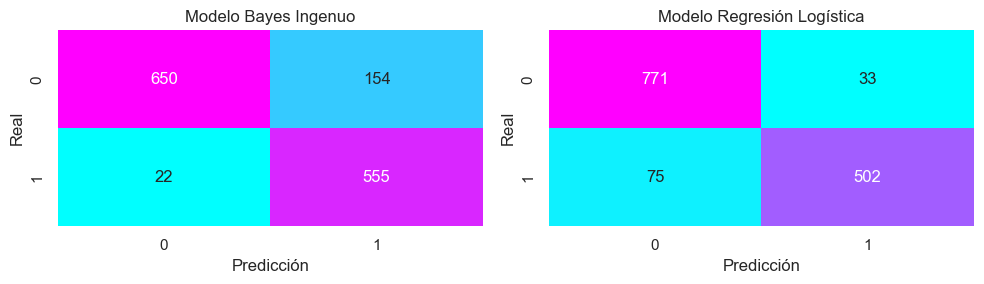

In [5]:
from sklearn.metrics import confusion_matrix

y_pred_bayes = bayes_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

cm_bayes = confusion_matrix(y_test, y_pred_bayes)
cm_log = confusion_matrix(y_test, y_pred_log)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.heatmap(cm_bayes, annot=True, fmt="d", cmap="cool", cbar=False, ax=axes[0])
axes[0].set_title("Modelo Bayes Ingenuo")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_log, annot=True, fmt="d", cmap="cool", cbar=False, ax=axes[1])
axes[1].set_title("Modelo Regresión Logística")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

El modelo de Bayes Ingenuo comete mas errores de falsos positivos (predice correos NO SPAM como SPAM), y menos falsos negativos (no predice tantos correos SPAM como NO SPAM).  
Por otro lado, el modelo de Regresión Logística comete mas errores de falsos negativos (predice correos SPAM como NO SPAM) y menos falsos positivos (no predice correos NO SPAM como SPAM)  
Para este problema en particular, es preferible disminuir la tasa de falsos positivos, ya que podríamos perder correos importantes y nos obligaría a mirar el SPAM.  
Por el contrario, posiblemente nos aparezcan mas correos SPAM en nuestra bandeja de entrada, pero es el precio que se paga por no perder los importantes.


### 🎯 6. Evaluación de modelos: métricas

In [6]:
# Punto 6
from sklearn.metrics import classification_report

print("Modelo Bayes Ingenuo")
target_names = ["NO SPAM", "SPAM"]
print(classification_report(y_test, y_pred_bayes, target_names=target_names))

print("Modelo Regresión Logística")
print(classification_report(y_test, y_pred_log, target_names=target_names))


Modelo Bayes Ingenuo
              precision    recall  f1-score   support

     NO SPAM       0.97      0.81      0.88       804
        SPAM       0.78      0.96      0.86       577

    accuracy                           0.87      1381
   macro avg       0.88      0.89      0.87      1381
weighted avg       0.89      0.87      0.87      1381

Modelo Regresión Logística
              precision    recall  f1-score   support

     NO SPAM       0.91      0.96      0.93       804
        SPAM       0.94      0.87      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.92      1381
weighted avg       0.92      0.92      0.92      1381



Evaluando la métrica precisión, el mejor modelo es el de regresión logística (78% Bayes vs 94% RegLog).  
Evaluando la métrica recuperación, el mejor modelo es el de Bayes ingenuo (96% Bayes vs 87% RegLog).  

Si observamos el puntaje $F_1$ vemos que la regresión logística tiene un mejor balance entre ambas métricas (86% Bayes vs 90% RegLog)

La métrica precisión evalúa los positivos sobre el total de positivos (reales y falsos positivos), nos da una idea de que tan seguro esta el modelo de haber identificado correctamente un positivo (en este caso los correos SPAM). Si fuera 1, estaríamos seguros que todos los correos identificados como SPAM lo son, y no perderíamos ningún mail real. En nuestro caso, con Bayes estamos perdiendo mayor cantidad de mails reales que se van a SPAM, comparado con regresión lineal.  

La métrica recuperación evalúa los positivos sobre el total de positivos (reales, incluyendo falsos negativos), nos da una idea de que tan bueno es el modelo para no confundir los positivos con negativos (en este caso confundir los correos SPAM como NO SPAM). Si fuera 1, estaríamos seguros que no nos llegaría ningún SPAM a la bandeja de entrada. En nuestro caso, con regresión lineal estamos recibiendo mayor cantidad de SPAM en la bandeja de entrada, comparado con Bayes.

### 📊 7. Curvas ROC y AUC

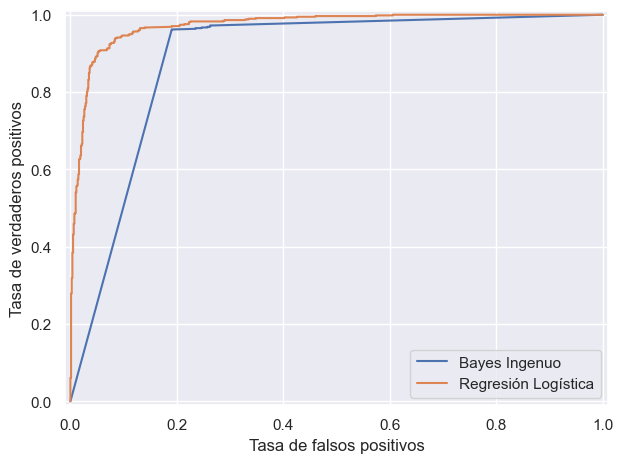

In [7]:
# Punto 7
from sklearn.metrics import roc_curve

p_pred_bayes = bayes_model.predict_proba(X_test)
p_pred_log = log_model.predict_proba(X_test)

titles = ["Bayes Ingenuo", "Regresión Logística"]
fpr_bayes, tpr_bayes, thr_bayes = roc_curve(y_test, p_pred_bayes[:, 1])
fpr_log, tpr_log, thr_log = roc_curve(y_test, p_pred_log[:, 1])

plt.plot(fpr_bayes, tpr_bayes, label=titles[0])
plt.plot(fpr_log, tpr_log, label=titles[1])
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout()

In [8]:
from sklearn.metrics import roc_auc_score

print(f"AUC Bayes Ingenuo: {roc_auc_score(y_test, p_pred_bayes[:, 1]):.3f}")

print(f"AUC Regresión Logística: {roc_auc_score(y_test, p_pred_log[:, 1]):.3f}")

AUC Bayes Ingenuo: 0.888
AUC Regresión Logística: 0.973
